In [2]:
%matplotlib inline
import os
from pprint import pprint
import shutil
import subprocess
import urllib.request

import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib.patches import Rectangle

import openmc.data

In [16]:
# Download ENDF file
# url = 'https://t2.lanl.gov/nis/data/data/ENDFB-VII.1-neutron/U/238'
# filename, headers = urllib.request.urlretrieve(url, 'u238.endf')

# Load into memory
filename = 'u238.endf'
# u238_endf = openmc.data.IncidentNeutron.from_endf(filename)
u238_h5 = openmc.data.IncidentNeutron.from_hdf5('/Users/y9z/Documents/GitHub/openmc/scripts/nndc_hdf5/U238.h5')
u238_h5


<IncidentNeutron: U238>

In [20]:
u238_h5[1].xs['294K'](6.67666666)

7554.5941599255293

In [21]:
u238_h5.energy

{'294K': array([  1.00000000e-05,   1.03125000e-05,   1.06250000e-05, ...,
          2.95000000e+07,   2.97500000e+07,   3.00000000e+07])}

In [22]:
u238_ace = openmc.data.IncidentNeutron.from_ace('/Users/y9z/Documents/GitHub/openmc/scripts/nndc/293.6K/U_238_293.6K.ace')

In [23]:
u238_ace[1].xs['294K'](6.67666666)

7554.5941640761521

In [25]:
u238_ace.energy['294K']

array([  1.00000000e-05,   1.03125000e-05,   1.06250000e-05, ...,
         2.95000000e+07,   2.97500000e+07,   3.00000000e+07])

In [27]:
u238_ace.energy['294K'][:50]

array([  1.00000000e-05,   1.03125000e-05,   1.06250000e-05,
         1.09375000e-05,   1.12500000e-05,   1.15625000e-05,
         1.18750000e-05,   1.21875000e-05,   1.25000000e-05,
         1.28125000e-05,   1.31250000e-05,   1.34375000e-05,
         1.37500000e-05,   1.43750000e-05,   1.50000000e-05,
         1.56250000e-05,   1.62500000e-05,   1.68750000e-05,
         1.75000000e-05,   1.81250000e-05,   1.87500000e-05,
         1.93750000e-05,   2.00000000e-05,   2.09375000e-05,
         2.18750000e-05,   2.28125000e-05,   2.37500000e-05,
         2.46875000e-05,   2.56250000e-05,   2.65625000e-05,
         2.75000000e-05,   2.84375000e-05,   2.93750000e-05,
         3.03125000e-05,   3.12500000e-05,   3.21875000e-05,
         3.31250000e-05,   3.40625000e-05,   3.50000000e-05,
         3.59375000e-05,   3.68750000e-05,   3.78125000e-05,
         3.87500000e-05,   3.96875000e-05,   4.06250000e-05,
         4.25000000e-05,   4.43750000e-05,   4.62500000e-05,
         4.81250000e-05,

In [32]:
u238_ace.name

'U238'

In [33]:
u238_ace.temperatures

['294K']

In [5]:
# Download ENDF file
url = 'https://t2.lanl.gov/nis/data/data/ENDFB-VII.1-neutron/H/2'
filename, headers = urllib.request.urlretrieve(url, 'h2.endf')

# Run NJOY to create deuterium data
h2 = openmc.data.IncidentNeutron.from_njoy('h2.endf', temperatures=[300., 400., 500.], stdout=True, njoy_exec='/Users/y9z/Documents/Softwares/NJOY2016/bin/njoy')


 njoy 2016.20  30Jul17                                       11/22/17 08:47:26
 *****************************************************************************

 reconr...                                                                0.0s

 broadr...                                                                0.0s
      300.0 deg                                                           0.0s
      400.0 deg                                                           0.2s
      500.0 deg                                                           0.3s

 heatr...                                                                 0.4s

 purr...                                                                  0.6s

 mat =  128                                                               0.6s

 ---message from purr---mat  128 has no resonance parameters
                          copy as is to nout

 acer...                                                                  0.6s

 acer...        

In [12]:
h2[1].xs['300K'](5)

3.3994348599999999

In [13]:
h2[1].xs['400K'](5)

3.4009008600000001

In [14]:
h2[1].xs['500K'](5)

3.4023658600000002

In [4]:
u238_endf[1].xs

{'0K': <openmc.data.function.Tabulated1D at 0x10fa34780>}

In [5]:
u238_endf[2].xs['0K'](2)

8.9500782910581798

In [16]:
elastic = u238_endf[2]

In [12]:
u238_endf.resonances.ranges

In [14]:
[(r.energy_min, r.energy_max) for r in u238_endf.resonances.ranges]

[(1e-05, 20000.0), (20000.0, 149028.8)]

Text(0,0.5,'Cross section (b)')

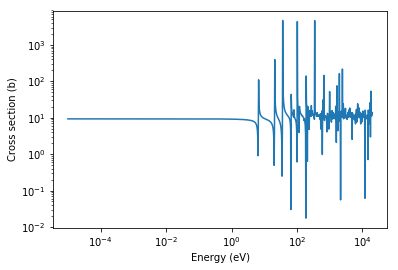

In [19]:
# Create log-spaced array of energies
resolved = u238_endf.resonances.resolved
energies = np.logspace(np.log10(resolved.energy_min),
                       np.log10(resolved.energy_max), 1000)

# Evaluate elastic scattering xs at energies
xs = elastic.xs['0K'](energies)

# Plot cross section vs energies
plt.loglog(energies, xs)
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

In [23]:
resolved.parameters.head(10)

,energy,L,J,neutronWidth,captureWidth,fissionWidthA,fissionWidthB
0,-4405.25,0,0.5,139.350000,0.023,0.0,0.0
1,-413.30,0,0.5,0.052154,0.023,0.0,0.0
2,-393.30,0,0.5,0.049939,0.023,0.0,0.0
3,-373.30,0,0.5,0.047647,0.023,0.0,0.0
4,-353.30,0,0.5,0.045274,0.023,0.0,0.0
5,-333.30,0,0.5,0.042811,0.023,0.0,0.0
6,-313.30,0,0.5,0.040253,0.023,0.0,0.0
7,-293.30,0,0.5,0.037593,0.023,0.0,0.0
8,-273.30,0,0.5,0.025514,0.023,0.0,0.0
9,-253.30,0,0.5,0.023972,0.023,0.0,0.0


In [6]:
u238_2 = openmc.data.IncidentNeutron.from_njoy('u238.endf', temperatures=[300], njoy_exec='/Users/y9z/Documents/Softwares/NJOY2016/bin/njoy', stdout=True)


 njoy 2016.20  30Jul17                                       11/21/17 13:01:07
 *****************************************************************************

 reconr...                                                                0.0s

 broadr...                                                              266.7s

 heatr...                                                               348.0s

 ---message from hinit---mt19 has no spectrum
                          mt18 spectrum will be used.

 ---message from nheat---changed q from   1.977860E+08 to   1.810380E+08
                          for mt  18

 purr...                                                                363.5s

 mat = 9237                                                             363.5s
      1 of    18 loops done for all temps & sig0s.                      384.2s
      2 of    18 loops done for all temps & sig0s.                      404.0s
      3 of    18 loops done for all temps & sig0s.                     

In [7]:
u238_2[1].xs

{'300K': <openmc.data.function.Tabulated1D at 0x11db43a90>}

In [8]:
u238_2[1].xs['300K'](3.52847e-05)

91.974789643488009

In [32]:
u238_endf.summed_reactions

OrderedDict()

In [30]:
list(u238_endf.reactions.values())

[<Reaction: MT=1 (n,total)>,
 <Reaction: MT=2 (n,elastic)>,
 <Reaction: MT=3>,
 <Reaction: MT=4 (n,level)>,
 <Reaction: MT=16 (n,2n)>,
 <Reaction: MT=17 (n,3n)>,
 <Reaction: MT=18 (n,fission)>,
 <Reaction: MT=19 (n,f)>,
 <Reaction: MT=20 (n,nf)>,
 <Reaction: MT=21 (n,2nf)>,
 <Reaction: MT=37 (n,4n)>,
 <Reaction: MT=38 (n,3nf)>,
 <Reaction: MT=51 (n,n1)>,
 <Reaction: MT=52 (n,n2)>,
 <Reaction: MT=53 (n,n3)>,
 <Reaction: MT=54 (n,n4)>,
 <Reaction: MT=55 (n,n5)>,
 <Reaction: MT=56 (n,n6)>,
 <Reaction: MT=57 (n,n7)>,
 <Reaction: MT=58 (n,n8)>,
 <Reaction: MT=59 (n,n9)>,
 <Reaction: MT=60 (n,n10)>,
 <Reaction: MT=61 (n,n11)>,
 <Reaction: MT=62 (n,n12)>,
 <Reaction: MT=63 (n,n13)>,
 <Reaction: MT=64 (n,n14)>,
 <Reaction: MT=65 (n,n15)>,
 <Reaction: MT=66 (n,n16)>,
 <Reaction: MT=67 (n,n17)>,
 <Reaction: MT=68 (n,n18)>,
 <Reaction: MT=69 (n,n19)>,
 <Reaction: MT=70 (n,n20)>,
 <Reaction: MT=71 (n,n21)>,
 <Reaction: MT=72 (n,n22)>,
 <Reaction: MT=73 (n,n23)>,
 <Reaction: MT=74 (n,n24)>,
 <React

In [23]:
u238_endf[1].xs['0K'](700.0)

0.0

In [24]:
u238_endf[2].xs['0K'](700.0)

12.424712562613369

In [107]:
gd157_endf[2].energy

AttributeError: 'Reaction' object has no attribute 'energy'

In [70]:
h2 = openmc.data.IncidentNeutron.from_njoy('gd157.endf', temperatures=[300., 400., 500.], stdout=True)

FileNotFoundError: [Errno 2] No such file or directory: 'njoy'

In [65]:
gd157_endf.reactions

OrderedDict([(1, <Reaction: MT=1 (n,total)>),
             (2, <Reaction: MT=2 (n,elastic)>),
             (4, <Reaction: MT=4 (n,level)>),
             (16, <Reaction: MT=16 (n,2n)>),
             (17, <Reaction: MT=17 (n,3n)>),
             (22, <Reaction: MT=22 (n,na)>),
             (24, <Reaction: MT=24 (n,2na)>),
             (28, <Reaction: MT=28 (n,np)>),
             (41, <Reaction: MT=41 (n,2np)>),
             (51, <Reaction: MT=51 (n,n1)>),
             (52, <Reaction: MT=52 (n,n2)>),
             (53, <Reaction: MT=53 (n,n3)>),
             (54, <Reaction: MT=54 (n,n4)>),
             (55, <Reaction: MT=55 (n,n5)>),
             (56, <Reaction: MT=56 (n,n6)>),
             (57, <Reaction: MT=57 (n,n7)>),
             (58, <Reaction: MT=58 (n,n8)>),
             (59, <Reaction: MT=59 (n,n9)>),
             (60, <Reaction: MT=60 (n,n10)>),
             (61, <Reaction: MT=61 (n,n11)>),
             (62, <Reaction: MT=62 (n,n12)>),
             (63, <Reaction: MT=63 (n,n13)>),

In [48]:
elastic = gd157_endf[2]
elastic.xs
elastic.xs['0K']

In [ ]:
aaa

In [32]:
pt.elements.isotope('231-U').density

18.393302210853296

In [34]:
pt.elements.isotope('231-U').mass

231.036289

In [35]:
pt.elements.isotope('232-U').mass

232.0371463

In [33]:
pt.elements.isotope('232-U').density

18.472982640575044

In [36]:
pt.elements.U.density

18.95

In [37]:
pt.elements.U.mass

238.02891

In [38]:
pt.elements.U.mass/pt.elements.U.density

12.56089234828496

In [39]:
pt.elements.isotope('232-U').mass/pt.elements.isotope('232-U').density

12.56089234828496